# Analyze LSR BCD Regression Results

In [1]:
#Installing the libraries
%pip install dill
%pip install path
%pip install numpy

In [2]:
#setting up the paths
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import sys
sys.path.append("/content/gdrive/MyDrive/The Pipeline/2D_Separable")
#Import Standard Data Analysis Libraries
import datetime
import numpy as np
import pandas as pd
import re
import scipy.io

#Import dill library to save variables generated
import dill
import pickle
import path
import os
from optimization import calculate_optimal_iterate_and_function_value, objective_function_tensor

In [4]:
pkl_file = f"/content/gdrive/MyDrive/The Pipeline/Experimental Results/16-16-4-4/Tensor Results/ExecutionTime_2024-03-11 21:17:28, n_train_300, n_test_100, p1_16, p2_16, d1_4, d2_4, S_1 _Dataset.pkl"

n_train = 300
n_test = 100

file= open(pkl_file, 'rb')
data = pickle.load(file)
file.close()

X_train_Full = data[0]
Y_train_Full = data[1]
X_test_Full = data[2]
Y_test_Full = data[3]
B_tensored = data[4]
lambda1 = data[5]
validation_normalized_estimation_error = data[6]
validation_nmse_losses = data[7]
validation_correlations = data[8]
validation_R2_scores = data[9]
objective_function_information = data[10]
normalized_estimation_error = data[11]
test_nmse_loss = data[12]
test_R2_loss = data[13]
test_correlation = data[14]
objective_function_values = data[15]

In [5]:
print("Best Lambda: ", lambda1)

Best Lambda:  100


There are no infinite values in the array.


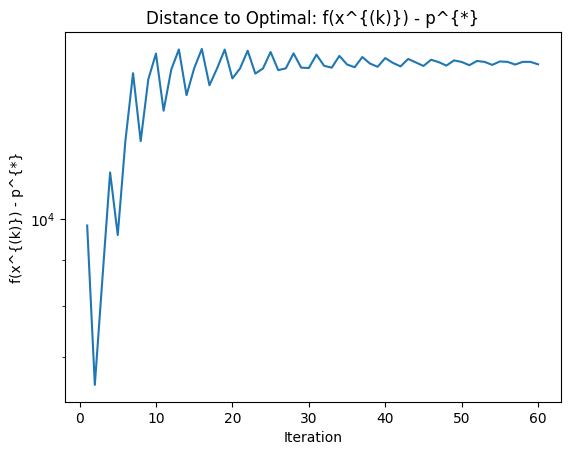

In [6]:
## Plot objective function information
import matplotlib.pyplot as plt

#Get X_train
X_train = X_train_Full[0:(n_train),:,:]
X_train = X_train.reshape((X_train.shape[0], -1))

#Get Y_train
Y_train = Y_train_Full[0:(n_train)].reshape((-1, 1))

#Find x* and p* for optimization problem for the best lambda
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, lambda1)

#Calculate objective function values for best lambda
objective_function_values_flattened = objective_function_values.flatten()
gap_to_optimality = objective_function_values_flattened - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(r'Distance to Optimal: f(x^{(k)}) - p^{*}')
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.yscale('log')
plt.show()

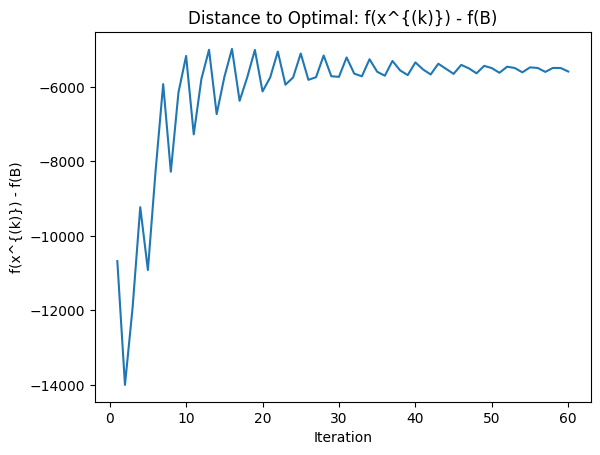

In [7]:
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (lambda1 * (np.linalg.norm(B_tensored_flattened) ** 2))

#Gap to B Tensored Value
gap_to_B_tensored_value = objective_function_values_flattened - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(r'Distance to Optimal: f(x^{(k)}) - f(B)')
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
# plt.yscale('log')
plt.show()

In [8]:
print(normalized_estimation_error)

0.017332503035838633


In [63]:
experimental_lambda = 0
lambda_index = 0

There are no infinite values in the array.


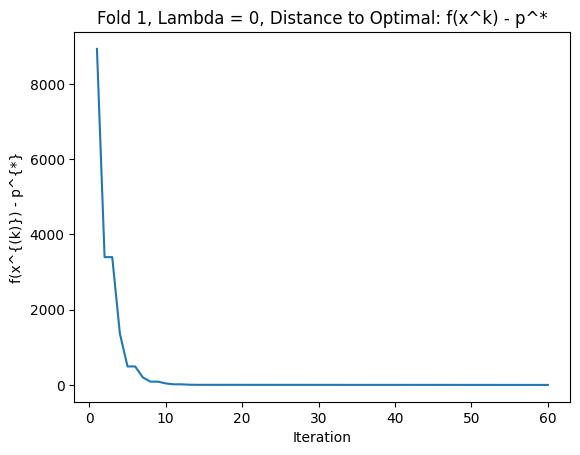

In [64]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 1
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

In [65]:
gap_to_optimality

array([8.92955154e+03, 3.39661306e+03, 3.39661306e+03, 1.36461522e+03,
       4.90708045e+02, 4.90708045e+02, 2.00504819e+02, 8.68479882e+01,
       8.68479882e+01, 3.95548372e+01, 1.67217286e+01, 1.67217286e+01,
       6.42819866e+00, 2.56373451e+00, 2.56373451e+00, 1.09069264e+00,
       5.11037738e-01, 5.11037738e-01, 2.59623171e-01, 1.41084718e-01,
       1.41084718e-01, 8.17546733e-02, 5.05632508e-02, 5.05632508e-02,
       3.36939572e-02, 2.43549059e-02, 2.43549059e-02, 1.91242371e-02,
       1.61636471e-02, 1.61636471e-02, 1.44803166e-02, 1.35185138e-02,
       1.35185138e-02, 1.29679600e-02, 1.26520366e-02, 1.26520366e-02,
       1.24705983e-02, 1.23662549e-02, 1.23662549e-02, 1.23062197e-02,
       1.22716493e-02, 1.22716493e-02, 1.22517361e-02, 1.22402594e-02,
       1.22402594e-02, 1.22336433e-02, 1.22298278e-02, 1.22298278e-02,
       1.22276268e-02, 1.22263569e-02, 1.22263569e-02, 1.22256240e-02,
       1.22252010e-02, 1.22252010e-02, 1.22249567e-02, 1.22248157e-02,
      

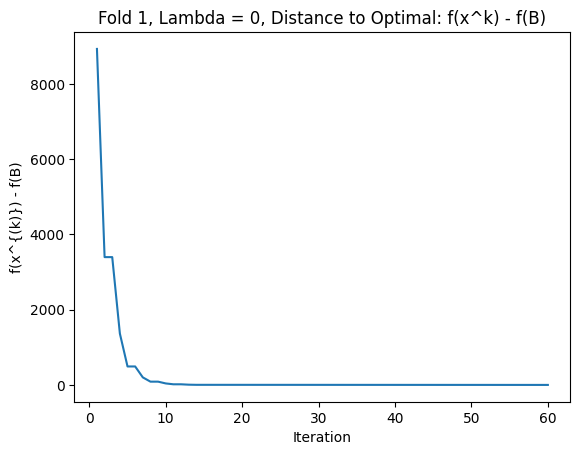

In [66]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

In [67]:
gap_to_B_tensored_value

array([ 8.92952433e+03,  3.39658585e+03,  3.39658585e+03,  1.36458801e+03,
        4.90680829e+02,  4.90680829e+02,  2.00477604e+02,  8.68207728e+01,
        8.68207728e+01,  3.95276218e+01,  1.66945132e+01,  1.66945132e+01,
        6.40098331e+00,  2.53651916e+00,  2.53651916e+00,  1.06347729e+00,
        4.83822387e-01,  4.83822387e-01,  2.32407820e-01,  1.13869367e-01,
        1.13869367e-01,  5.45393221e-02,  2.33478995e-02,  2.33478995e-02,
        6.47860596e-03, -2.86044529e-03, -2.86044529e-03, -8.09111415e-03,
       -1.10517041e-02, -1.10517041e-02, -1.27350346e-02, -1.36968374e-02,
       -1.36968374e-02, -1.42473913e-02, -1.45633146e-02, -1.45633146e-02,
       -1.47447529e-02, -1.48490964e-02, -1.48490964e-02, -1.49091316e-02,
       -1.49437019e-02, -1.49437019e-02, -1.49636152e-02, -1.49750918e-02,
       -1.49750918e-02, -1.49817079e-02, -1.49855235e-02, -1.49855235e-02,
       -1.49877244e-02, -1.49889943e-02, -1.49889943e-02, -1.49897272e-02,
       -1.49901503e-02, -

There are no infinite values in the array.


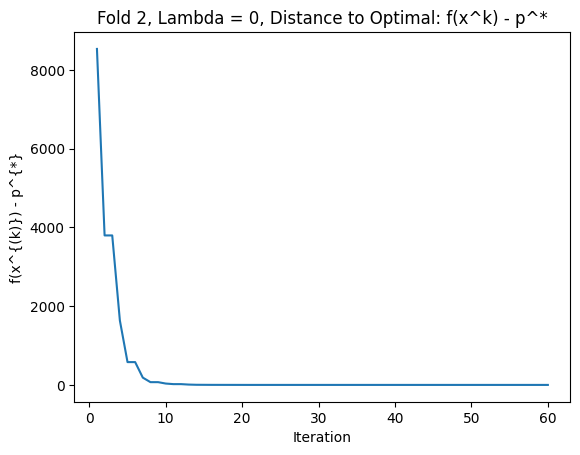

In [68]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 2
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

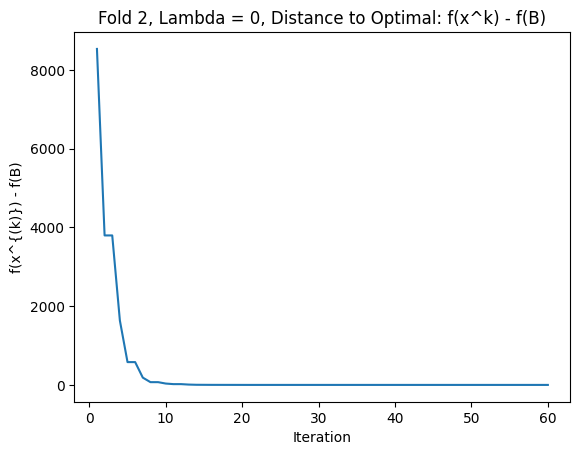

In [69]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are no infinite values in the array.


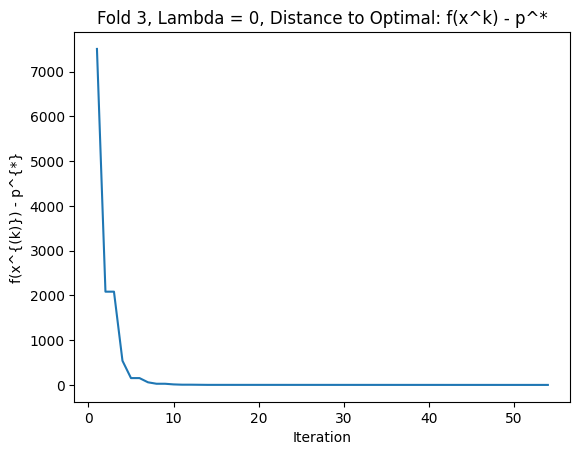

In [70]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 3
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

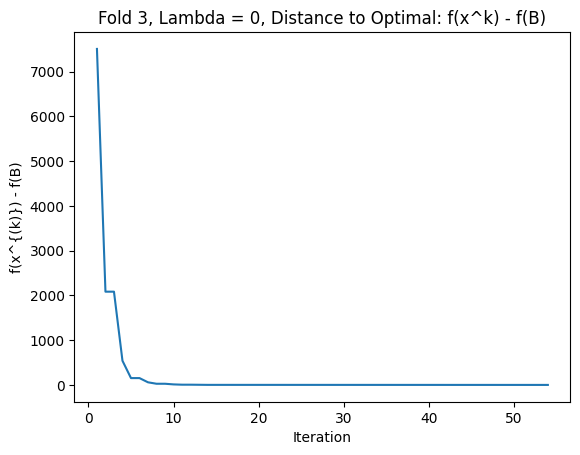

In [71]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are no infinite values in the array.


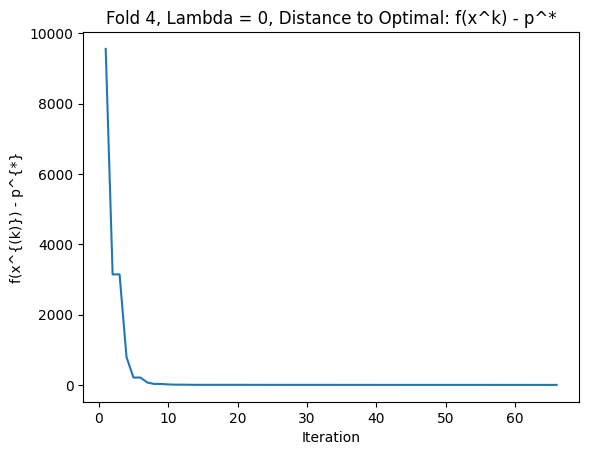

In [72]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 4
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

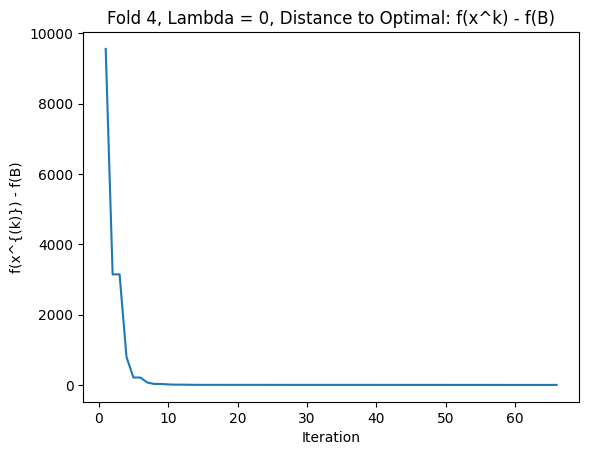

In [73]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are no infinite values in the array.


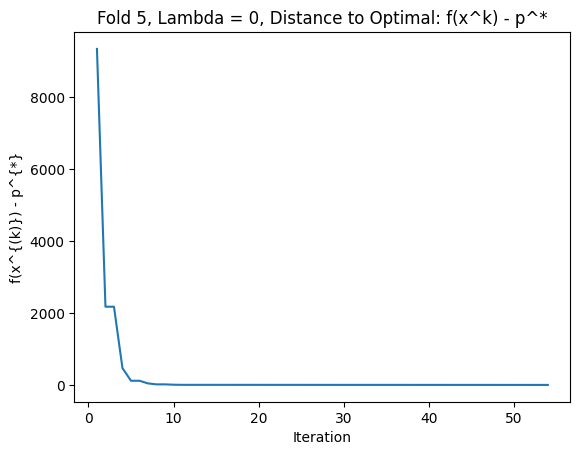

In [74]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 5
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

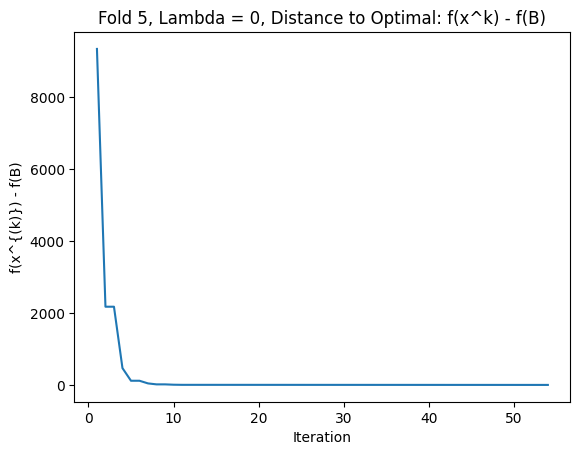

In [75]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are no infinite values in the array.


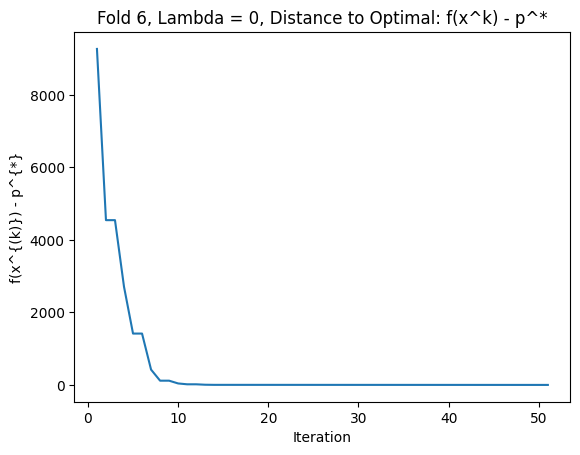

In [76]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 6
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

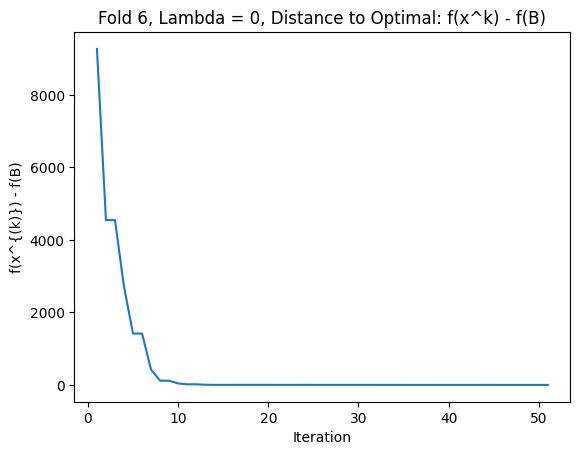

In [77]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are no infinite values in the array.


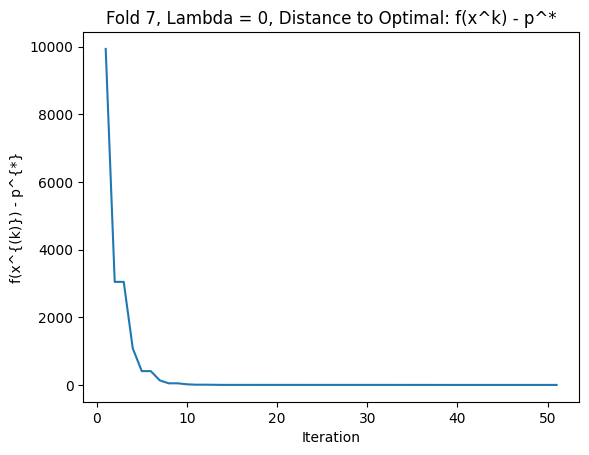

In [78]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 7
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

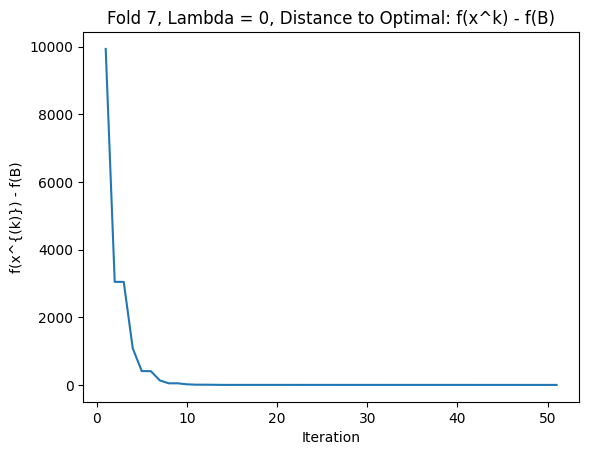

In [79]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are no infinite values in the array.


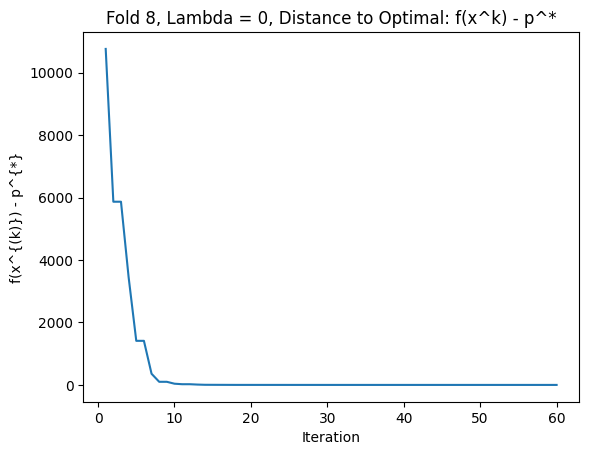

In [80]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 8
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

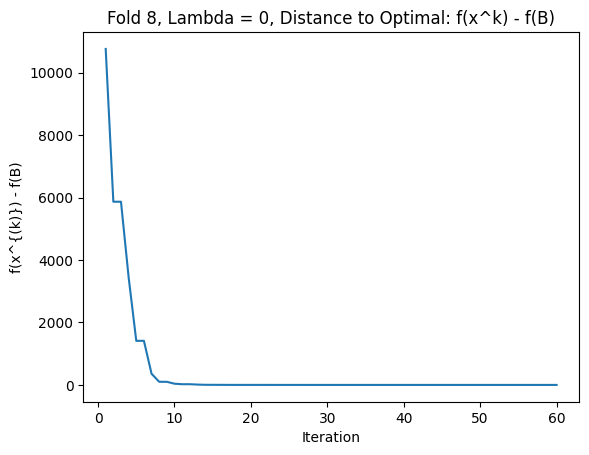

In [81]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are no infinite values in the array.


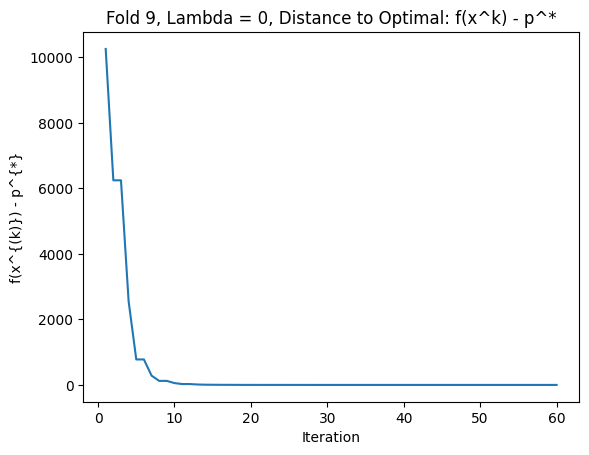

In [82]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 9
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

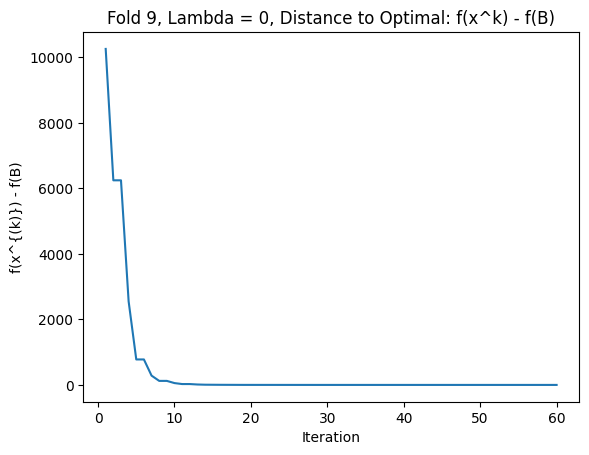

In [83]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

There are no infinite values in the array.


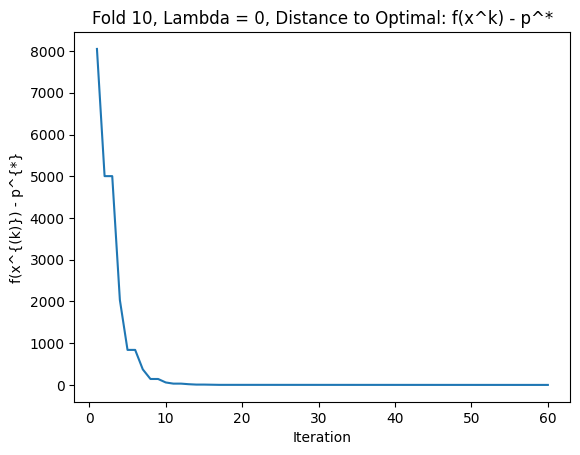

In [84]:
B_optimal, p_star = calculate_optimal_iterate_and_function_value(X_train, Y_train, experimental_lambda)
fold = 10
values = objective_function_information[fold - 1, lambda_index, :, :, :].flatten()
gap_to_optimality = values - p_star

## Sanity Check
if np.any(np.isinf(objective_function_values_flattened)):
    print("There are infinite values in the array.")
else:
    print("There are no infinite values in the array.")

#Plot Gap to Optimality
plt.plot(range(1, len(gap_to_optimality) + 1), gap_to_optimality)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - p^*")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - p^{*}')
plt.show()

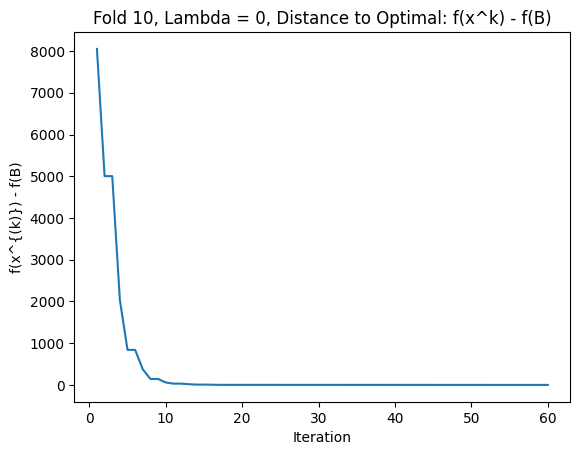

In [85]:
#Gap to B Tensored Value
B_tensored_flattened = B_tensored.reshape(-1, 1)
I = X_train @ B_tensored_flattened
p_B_tensored = (np.linalg.norm(Y_train - I) ** 2) + (experimental_lambda * (np.linalg.norm(B_tensored_flattened) ** 2))
gap_to_B_tensored_value = values - p_B_tensored

#Plot Gap to B Tensored Value
plt.plot(range(1, len(gap_to_B_tensored_value) + 1), gap_to_B_tensored_value)
plt.title(f"Fold {fold}, Lambda = {experimental_lambda}, Distance to Optimal: f(x^k) - f(B)")
plt.xlabel('Iteration')
plt.ylabel('f(x^{(k)}) - f(B)')
plt.show()

In [86]:
validation_normalized_estimation_error[:, lambda_index].flatten()

array([9.86064225e-07, 8.41493147e-07, 1.02265695e-06, 9.35321768e-07,
       8.69472842e-07, 9.78241904e-07, 1.03594362e-06, 8.77750573e-07,
       9.58941494e-07, 9.78980608e-07])

In [87]:
validation_correlations[:, lambda_index].flatten()

array([ 0.37906203, -0.28005648,  0.05952899,  0.36724929,  0.07019652,
        0.1253305 , -0.09102897, -0.15075962, -0.04687467, -0.16520014])

In [88]:
validation_R2_scores[:, lambda_index].flatten()

array([-0.82084383, -1.68485572, -0.80651106, -0.96420876, -1.10216423,
       -0.31435366, -1.26869089, -1.10508864, -1.42408535, -2.20888914])

In [89]:
validation_nmse_losses[:, lambda_index].flatten()

array([71.04533692, 59.78785008, 55.42520239, 85.18933803, 66.85403147,
       43.67625393, 61.05866428, 54.92762534, 69.34430258, 82.73649782])